In [1]:
import pandas as pd
import pymysql
import numpy as np
import matplotlib.pylab as plt

In [118]:
conn = pymysql.connect(host='127.0.0.1', port = 3306, user='root',passwd = 'mysql', db = 'craglist_data',charset='utf8')
sql = "select * from cars_info"
df = pd.read_sql(sql,conn)
df.head(15)

,Title,Paint_color,Odometer,Fuel,Drive,carType,Title_status,Price
0,2011 DODGE GRAND CARAVAN,silver,90000,gas,fwd,mini-van,clean,8990
1,2012 Mercedes-Benz GL-Class 4MATIC 4d,black,44414,gas,None,SUV,clean,29977
2,2010 Cadillac CTS-4 Wagon,white,85000,gas,4wd,wagon,clean,12999
3,2014 BMW 3 SERIES,blue,48958,gas,,sedan,clean,4000
4,2014 Nissan Altima 2.5 SL,None,97275,gas,None,None,clean,5999
5,2011 Kia Sorento,black,99460,gas,4wd,SUV,clean,9995
6,2012 Dodge Charger 4dr Sdn SE RWD,silver,103122,other,rwd,sedan,clean,7980
7,2014 MERCEDES-BENZ E-CLASS,blue,15861,gas,,sedan,clean,4000
8,2006 Toyota 4Runner,None,124000,gas,4wd,None,clean,9200
9,2012 Honda Odyssey EX-L,None,50714,gas,fwd,mini-van,clean,19789


In [153]:
df.describe()

,Odometer,Price,carType1
count,2026.000000,2026.000000,2026.000000
mean,70000.258144,14833.557256,11.385982
std,43926.756809,12139.839820,2.288151
min,0.000000,1600.000000,1.000000
25%,37048.250000,8980.000000,11.000000
50%,62521.000000,11924.000000,12.000000
75%,97016.500000,16998.750000,13.000000
max,414024.000000,219890.000000,13.000000


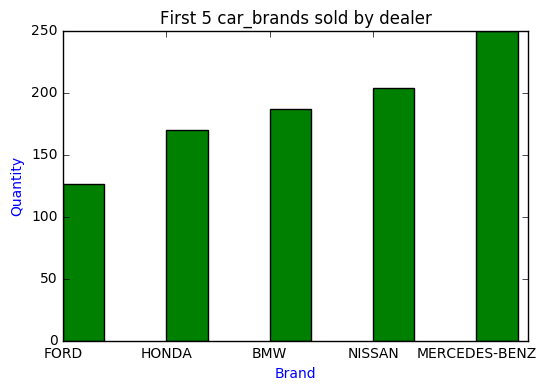

In [10]:
#rank the popularity of cars, find the first 5 brands
title = df['Title']
brands = []
for i in title:
    brands.append(i.split()[1].upper())
brand= set(brands)
brand_value = {}
for i in brand:
    brand_value[i] = brands.count(i)
brand_value = sorted(brand_value.items(), key=lambda item:item[1])
first_5 = brand_value[-5:]
first_5_brands = [i[0] for i in first_5]
first_5_values = [i[1] for i in first_5]
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(np.arange(5), first_5_values,width = 0.4, color = 'g')
ax.set_xticks(np.arange(5))
ax.set_xticklabels(first_5_brands)
ax.set_xlabel('Brand',color = 'Blue')
ax.set_ylabel('Quantity',color = 'Blue')
plt.title('First 5 car_brands sold by dealer')
plt.show()

In [28]:
#count_value function is used to count the number of character in every feature
def count_value(column, attr):
    return sum(1 for i in column if i == attr)
count_value(df.Title_status, 'clean')

1995

In [124]:
def change_attr_to_value(column):
    dict_ = {}
    for i in column.unique():
        dict_[i] = count_value(column, i)
    #print(dict_)
    list_sorted = sorted(dict_.items(), key = lambda item:item[1])
    list_sorted = [list(item) for item in list_sorted]
    dict_sorted = {}
    for i in range(len(list_sorted)):
        list_sorted[i][1] = i + 1
        dict_sorted[list_sorted[i][0]] = list_sorted[i][1]
    print(dict_sorted)
    return dict_sorted
cartype = change_attr_to_value(df.carType)

{'hatchback': 2, 'convertible': 9, 'SUV': 12, 'sedan': 13, 'wagon': 5, 'coupe': 10, 'pickup': 4, 'truck': 3, None: 11, 'van': 7, 'bus': 1, 'mini-van': 8, 'other': 6}


In [125]:
#map the corresponding values to carType1
df['carType1'] = df['carType'].map(cartype)

In [146]:
df.head(10)

,Title,Paint_color,Odometer,Fuel,Drive,carType,Title_status,Price,carType1
0,2011 DODGE GRAND CARAVAN,silver,90000,gas,fwd,mini-van,clean,8990,8
1,2012 Mercedes-Benz GL-Class 4MATIC 4d,black,44414,gas,None,SUV,clean,29977,12
2,2010 Cadillac CTS-4 Wagon,white,85000,gas,4wd,wagon,clean,12999,5
3,2014 BMW 3 SERIES,blue,48958,gas,,sedan,clean,4000,13
4,2014 Nissan Altima 2.5 SL,None,97275,gas,None,None,clean,5999,11
5,2011 Kia Sorento,black,99460,gas,4wd,SUV,clean,9995,12
6,2012 Dodge Charger 4dr Sdn SE RWD,silver,103122,other,rwd,sedan,clean,7980,13
7,2014 MERCEDES-BENZ E-CLASS,blue,15861,gas,,sedan,clean,4000,13
8,2006 Toyota 4Runner,None,124000,gas,4wd,None,clean,9200,11
9,2012 Honda Odyssey EX-L,None,50714,gas,fwd,mini-van,clean,19789,8


In [139]:
np.random.randint(8000,12000)

10772

In [151]:
#change price to be reasonable
df['Price'] = df['Price'].replace(4000, np.random.randint(8000,12000))

In [163]:
#divide the Price class into 3 categories(1 = low, 2 = middle, 3 = high)
bins = [0,6000,11000,1000000]
labels = pd.cut(df.Price, bins, labels = [1,2,3])
df.price_level = labels

In [164]:
df[:10]

,Title,Paint_color,Odometer,Fuel,Drive,carType,Title_status,Price,carType1,price_level
0,2011 DODGE GRAND CARAVAN,silver,90000,gas,fwd,mini-van,clean,8990,8,2
1,2012 Mercedes-Benz GL-Class 4MATIC 4d,black,44414,gas,None,SUV,clean,29977,12,3
2,2010 Cadillac CTS-4 Wagon,white,85000,gas,4wd,wagon,clean,12999,5,3
3,2014 BMW 3 SERIES,blue,48958,gas,,sedan,clean,11924,13,3
4,2014 Nissan Altima 2.5 SL,None,97275,gas,None,None,clean,5999,11,1
5,2011 Kia Sorento,black,99460,gas,4wd,SUV,clean,9995,12,2
6,2012 Dodge Charger 4dr Sdn SE RWD,silver,103122,other,rwd,sedan,clean,7980,13,2
7,2014 MERCEDES-BENZ E-CLASS,blue,15861,gas,,sedan,clean,11924,13,3
8,2006 Toyota 4Runner,None,124000,gas,4wd,None,clean,9200,11,2
9,2012 Honda Odyssey EX-L,None,50714,gas,fwd,mini-van,clean,19789,8,3


In [180]:
df_x = pd.concat([df.Odometer, df.carType1],axis=1)

In [181]:
df_x[:5]

,Odometer,carType1
0,90000,8
1,44414,12
2,85000,5
3,48958,13
4,97275,11


In [170]:
df_y = df.price_level

In [171]:
df_y.head()

0    2
1    3
2    3
3    3
4    1
Name: price_level, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [192]:
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
X, y = df_x.values, np.array(df_y.values)

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [288]:
svm = SVC(kernel = 'rbf', gamma = 0.1, C = 1.0 , random_state = 0)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [289]:
svm.score(X_test, y_test)

0.68585526315789469